# Exploratory Data Analysis: Discord Spam Detector

### Tamara Frances
<br>

---
<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_excel('../data/data-for-capstone.xlsx')
df.columns = df.columns.str.lower()
df = df.rename(columns={'spam?':'spam'})

<br>

---

<br>

In [3]:
df[df['spam'] == 'N'].head()

,text,spam
0,The bird is the word,N
1,Was checking out at kith,N
2,mine making to much noise,N
3,We chillin over here at 75 degrees lmao,N
4,should be dropping tomorrow selling well rn on...,N


In [4]:
df[df['spam'] == 'Y'].head()

,text,spam
570,Hey! Are you a reseller? If you are chances ar...,Y
571,We can refund hundreds of different stores wit...,Y
572,Well lucky for you our service is here. . Now ...,Y
573,So no need to worry! Come join now!,Y
574,CoinGrowBit - Professional digital asset tradi...,Y


In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

<br>

---

<br>

In [6]:
#calculating the wordcount of not spam
df_notspam = df[df['spam'] == 'N']

wc_notspam = []
for string in df_notspam['text']:
    wc_notspam.append(len(string.strip().split(' ')))  
df_notspam['word_count'] = wc_notspam

#calculating the text length of not spam
length_notspam = []
for string in df_notspam['text']:
    a = string.strip()
    length_notspam.append(len(a))
df_notspam['text_length'] = length_notspam

#calculating the wordcount of spam

df_spam = df[df['spam'] == 'Y']
wc_spam = []
for string in df_spam['text']:
    wc_spam.append(len(string.strip().split(' ')))  
df_spam['word_count'] = wc_spam


#calculating the text length of spam
length_notspam = []
for string in df_spam['text']:
    a = string.strip()
    length_notspam.append(len(a))
df_spam['text_length'] = length_notspam

/var/folders/lt/x127bqmn1g31b73t2m2hj18r0000gn/T/ipykernel_75467/581188541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notspam['word_count'] = wc_notspam
/var/folders/lt/x127bqmn1g31b73t2m2hj18r0000gn/T/ipykernel_75467/581188541.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notspam['text_length'] = length_notspam
/var/folders/lt/x127bqmn1g31b73t2m2hj18r0000gn/T/ipykernel_75467/581188541.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

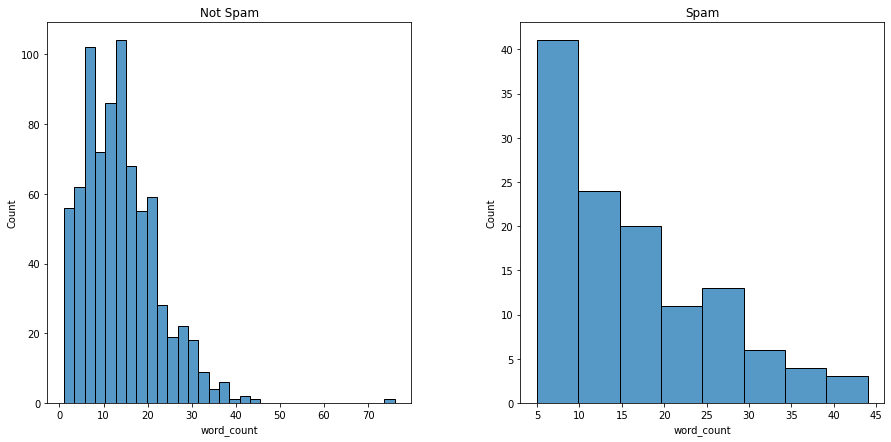

In [7]:
# word count: not spam vs spam

r,c = plt.subplots(1, 2, figsize=(15,7))
a = sns.histplot(df_notspam['word_count'], ax=c[0]).set_title('Not Spam')
b = sns.histplot(df_spam['word_count'], ax=c[1]).set_title('Spam')
plt.subplots_adjust(wspace=0.3, hspace=0.1)

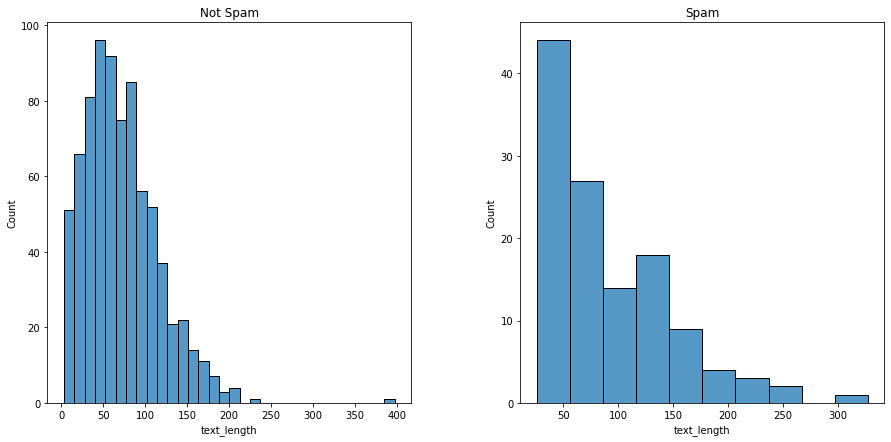

In [8]:
# text length: not spam vs spam

r,c = plt.subplots(1, 2, figsize=(15,7))
a = sns.histplot(df_notspam['text_length'], ax=c[0]).set_title('Not Spam')
b = sns.histplot(df_spam['text_length'], ax=c[1]).set_title('Spam')
plt.subplots_adjust(wspace=0.3, hspace=0.1)

<br>

---

<br>

In [9]:
df['spam'].value_counts(normalize=True)

#imbalanced

N    0.863991
Y    0.136009
Name: spam, dtype: float64

<AxesSubplot:xlabel='spam', ylabel='Count'>

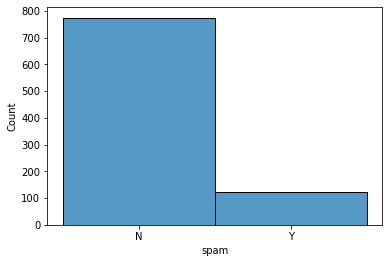

In [10]:
sns.histplot(df['spam'])

In [11]:
#calculating the wordcount of the text
wc = []
for string in df['text']:
    wc.append(len(string.strip().split(' ')))  
df['word_count'] = wc


#calculating the length of the text
length = []
for string in df['text']:
    a = string.strip()
    length.append(len(a))
df['text_length'] = length


In [12]:
df.head()

,text,spam,word_count,text_length
0,The bird is the word,N,5,20
1,Was checking out at kith,N,5,24
2,mine making to much noise,N,5,25
3,We chillin over here at 75 degrees lmao,N,8,39
4,should be dropping tomorrow selling well rn on...,N,9,51


<br>

---

<br>

In [13]:
#exploring the dataframe

df['text_length'].describe()

count    897.000000
mean      74.554069
std       46.376415
min        3.000000
25%       41.000000
50%       66.000000
75%       98.000000
max      397.000000
Name: text_length, dtype: float64

In [14]:
df['word_count'].describe()

count    897.000000
mean      14.253066
std        8.596326
min        1.000000
25%        8.000000
50%       13.000000
75%       19.000000
max       76.000000
Name: word_count, dtype: float64

In [15]:
import matplotlib.pyplot as plt

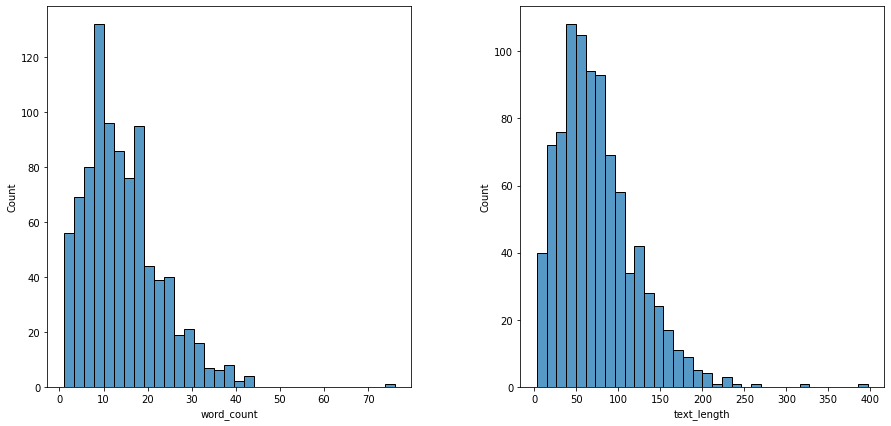

In [16]:
r,c = plt.subplots(1, 2, figsize=(15,7))
a = sns.histplot(df['word_count'], ax=c[0])
b = sns.histplot(df['text_length'], ax=c[1])
plt.subplots_adjust(wspace=0.3, hspace=0.1)

#both word count and text length are right skewed among all discord messages

/Users/tamarafrances/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tamarafrances/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


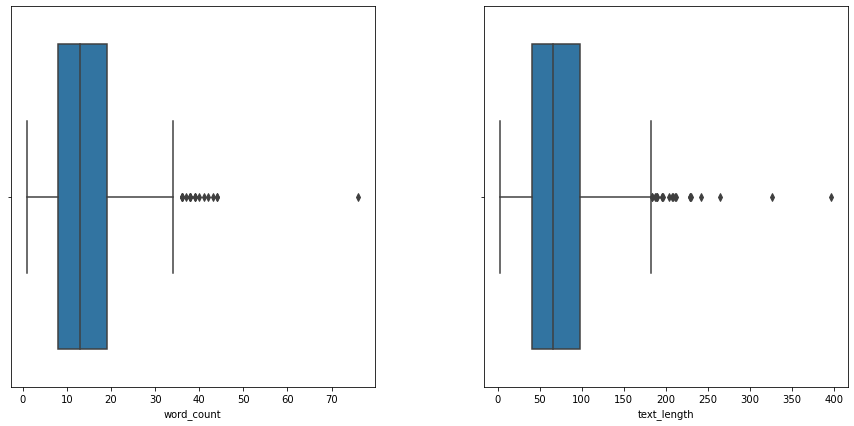

In [17]:
#boxplots 
r,c = plt.subplots(1, 2, figsize=(15,7))
a = sns.boxplot(df['word_count'], ax=c[0])
b = sns.boxplot(df['text_length'], ax=c[1])
plt.subplots_adjust(wspace=0.3, hspace=0.1);

In [18]:
#mean wordcount by not spam/spam

df['word_count'].groupby(df['spam']).mean()

spam
N    13.939355
Y    16.245902
Name: word_count, dtype: float64

In [19]:
#mean text length by not spam/spam

df['text_length'].groupby(df['spam']).mean()

spam
N    71.584516
Y    93.418033
Name: text_length, dtype: float64

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer()
df_cv = cv.fit_transform(df['text'])
df_cv.shape

(897, 2673)

In [22]:
words = pd.DataFrame(df_cv.A, columns=cv.get_feature_names_out())
wordcounts = words.sum().sort_values(ascending=False).head(15)
wordcounts = pd.DataFrame(wordcounts)

<br>

---

<br>

In [23]:
#sentimentanalysis
#https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

from textblob import TextBlob
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).subjectivity)

In [24]:
df.head()

,text,spam,word_count,text_length,polarity,subjectivity
0,The bird is the word,N,5,20,0.0,0.0
1,Was checking out at kith,N,5,24,0.0,0.0
2,mine making to much noise,N,5,25,0.2,0.2
3,We chillin over here at 75 degrees lmao,N,8,39,0.6,1.0
4,should be dropping tomorrow selling well rn on...,N,9,51,0.0,0.0


In [25]:
df['polarity'].groupby(df['spam']).mean() #-1 is negative, 1 is positive

#slightly more positive - maybe to convince people to keep reading or click links

spam
N    0.098749
Y    0.150162
Name: polarity, dtype: float64

In [26]:
df['subjectivity'].groupby(df['spam']).mean() #-1 is objective, 1 is subjective

#not surprised these are so close since spam bots try to get past spam filters, need to mimic nonspam as much as possible

spam
N    0.343345
Y    0.362479
Name: subjectivity, dtype: float64

<br>

---

<br>

In [27]:
#bigrams and trigrams - not spam
#https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

from nltk.corpus import stopwords
stoplist = stopwords.words('english')
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_notspam['text'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram_notspam = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
df_ngram_notspam

,frequency,bigram/trigram
0,5,looks like
1,5,evolving skies
2,5,burning shadows
3,5,booster box
4,4,trying get
...,...,...
8823,1,10 apy
8824,1,0x see hash
8825,1,0x see
8826,1,002 back 01


<AxesSubplot:xlabel='frequency', ylabel='bigram/trigram'>

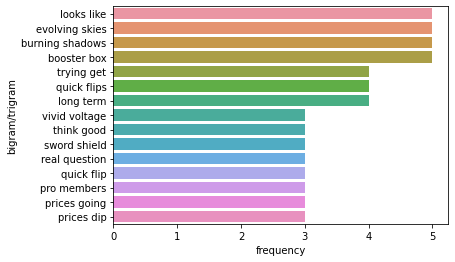

In [28]:
sns.barplot(x="frequency", y="bigram/trigram", data=df_ngram_notspam.head(15))

In [29]:
df_ngram_notspam['polarity'] = df_ngram_notspam['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_notspam['subjectivity'] = df_ngram_notspam['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [30]:
df_ngram_notspam.head()

,frequency,bigram/trigram,polarity,subjectivity
0,5,looks like,0.0,0.0
1,5,evolving skies,0.0,0.0
2,5,burning shadows,0.0,0.0
3,5,booster box,0.0,0.0
4,4,trying get,0.0,0.0


In [31]:
df_ngram_notspam.describe()

,frequency,polarity,subjectivity
count,8828.000000,8828.000000,8828.000000
mean,1.026393,0.043484,0.149048
std,0.193602,0.216454,0.275573
min,1.000000,-1.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.200000
max,5.000000,1.000000,1.000000


<br>

---

<br>

In [32]:
#bigrams and trigrams - spam

In [33]:
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df_spam['text'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram_spam = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
df_ngram_spam

,frequency,bigram/trigram
0,7,whitelisted mint
1,4,sounds interesting
2,4,per nft
3,4,money back
4,4,good luck
...,...,...
1640,1,000 worth
1641,1,000 guaranteed wl
1642,1,000 guaranteed
1643,1,000 eth party


<AxesSubplot:xlabel='frequency', ylabel='bigram/trigram'>

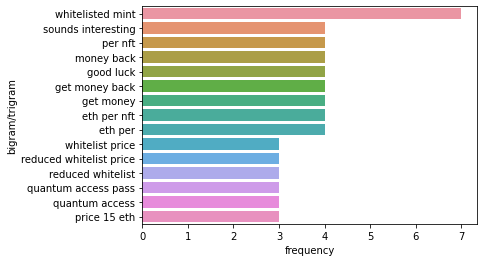

In [34]:
sns.barplot(x="frequency", y="bigram/trigram", data=df_ngram_spam.head(15))

In [35]:
df_ngram_spam['polarity'] = df_ngram_spam['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_spam['subjectivity'] = df_ngram_spam['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [36]:
df_ngram_spam.head()

,frequency,bigram/trigram,polarity,subjectivity
0,7,whitelisted mint,0.0,0.0
1,4,sounds interesting,0.5,0.5
2,4,per nft,0.0,0.0
3,4,money back,0.0,0.0
4,4,good luck,0.7,0.6


In [37]:
df_ngram_spam.describe()

,frequency,polarity,subjectivity
count,1645.000000,1645.000000,1645.000000
mean,1.100304,0.053129,0.150146
std,0.399551,0.186318,0.266595
min,1.000000,-0.500000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.300000
max,7.000000,1.000000,1.000000
